In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = 2019
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

# 2023中国开源年度报告

## 3.技术领域项目分析

### 3.1 各领域OpenRank Top 10 榜单

### 大数据

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/big_data'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │  '7833168'  │ 'GitHub' │    'elastic/kibana'     │ [ 7601.04 ] │
│    1    │ '15111821'  │ 'GitHub' │    'grafana/grafana'    │ [ 7134.37 ] │
│    2    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4941.99 ] │
│    3    │ '283046497' │ 'GitHub' │   'airbytehq/airbyte'   │ [ 4658.86 ] │
│    4    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4307.26 ] │
│    5    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3729.39 ] │
│    6    │ '33884891'  │ 'GitHub' │    'apache/airflow'     │ [ 3642.9 ]  │
│    7    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3194.56 ] │
│    8    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2703.4 ]  │
│    9    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2654.02 ] │

### 数据库

In [3]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/database'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse' │ [ 4941.99 ] │
│    1    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 4307.26 ] │
│    2    │  '507775'   │ 'GitHub' │ 'elastic/elasticsearch' │ [ 3729.39 ] │
│    3    │ '16563587'  │ 'GitHub' │ 'cockroachdb/cockroach' │ [ 3443.7 ]  │
│    4    │ '402945349' │ 'GitHub' │  'StarRocks/starrocks'  │ [ 3194.56 ] │
│    5    │ '166515022' │ 'GitHub' │     'trinodb/trino'     │ [ 2703.4 ]  │
│    6    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2654.02 ] │
│    7    │ '41986369'  │ 'GitHub' │     'pingcap/tidb'      │ [ 2200.38 ] │
│    8    │ '208728772' │ 'GitHub' │   'milvus-io/milvus'    │ [ 2001.11 ] │
│    9    │ '105944401' │ 'GitHub' │ 'yugabyte/yugabyte-db'  │ [ 1940.75 ] │

### 操作系统

In [4]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/operating_system'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │              name              │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────┼─────────────┤
│    0    │ '160083795' │ 'GitHub' │     'SerenityOS/serenity'      │ [ 2257.68 ] │
│    1    │ '105627846' │ 'GitHub' │       'reactos/reactos'        │ [ 745.23 ]  │
│    2    │ '24905898'  │ 'GitHub' │        'armbian/build'         │  [ 679.1 ]  │
│    3    │ '179385712' │ 'GitHub' │ 'bottlerocket-os/bottlerocket' │ [ 462.12 ]  │
│    4    │ '181022316' │ 'GitHub' │      'unikraft/unikraft'       │ [ 340.81 ]  │
│    5    │ '36428094'  │ 'GitHub' │          'tock/tock'           │ [ 275.34 ]  │
│    6    │ '61721573'  │ 'GitHub' │   'jens-maus/RaspberryMatic'   │ [ 176.58 ]  │
│    7    │ '97989275'  │ 'GitHub' │      'theseus-os/Theseus'      │ [ 154.98 ]  │
│    8    │ '71775220'  │ 'GitHub' │          'PDP-10/its'          │  [ 69.

### 云原生

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/cloud_native'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────┬─────────────┐
│ (index) │     id      │ platform │           name           │  openrank   │
├─────────┼─────────────┼──────────┼──────────────────────────┼─────────────┤
│    0    │ '15111821'  │ 'GitHub' │    'grafana/grafana'     │ [ 7134.37 ] │
│    1    │ '75821432'  │ 'GitHub' │   'llvm/llvm-project'    │ [ 7049.62 ] │
│    2    │ '20580498'  │ 'GitHub' │ 'kubernetes/kubernetes'  │ [ 5374.14 ] │
│    3    │ '60246359'  │ 'GitHub' │ 'ClickHouse/ClickHouse'  │ [ 4941.99 ] │
│    4    │ '48109239'  │ 'GitHub' │     'cilium/cilium'      │ [ 3215.42 ] │
│    5    │  '2310495'  │ 'GitHub' │       'ceph/ceph'        │ [ 3172.49 ] │
│    6    │ '11125589'  │ 'GitHub' │   'keycloak/keycloak'    │ [ 3095.56 ] │
│    7    │ '31558937'  │ 'GitHub' │ 'gravitational/teleport' │ [ 3082.18 ] │
│    8    │ '65214191'  │ 'GitHub' │    'envoyproxy/envoy'    │ [ 2929.08 ] │
│    9    │ '236095576' │ 'GitHub' │  'backstage/backstage'   │ 

### 前端

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/frontend'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '31792824'  │ 'GitHub' │    'flutter/flutter'    │ [ 9367.81 ] │
│    1    │ '70107786'  │ 'GitHub' │    'vercel/next.js'     │ [ 6638.65 ] │
│    2    │ '275993885' │ 'GitHub' │ 'appsmithorg/appsmith'  │ [ 3474.07 ] │
│    3    │ '71995937'  │ 'GitHub' │       'nuxt/nuxt'       │ [ 3387.23 ] │
│    4    │ '29028775'  │ 'GitHub' │ 'facebook/react-native' │ [ 3260.55 ] │
│    5    │ '34526884'  │ 'GitHub' │ 'ant-design/ant-design' │ [ 3053.25 ] │
│    6    │ '27193779'  │ 'GitHub' │      'nodejs/node'      │ [ 2736.37 ] │
│    7    │ '24195339'  │ 'GitHub' │    'angular/angular'    │ [ 2273.82 ] │
│    8    │  '9384267'  │ 'GitHub' │   'electron/electron'   │ [ 1773.31 ] │
│    9    │ '133442384' │ 'GitHub' │     'denoland/deno'     │ [ 1654.01 ] │

### 人工智能

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬──────────────┐
│ (index) │     id      │ platform │                  name                  │   openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼──────────────┤
│    0    │ '65600975'  │ 'GitHub' │           'pytorch/pytorch'            │ [ 10182.45 ] │
│    1    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 6080.25 ]  │
│    2    │ '65711522'  │ 'GitHub' │         'PaddlePaddle/Paddle'          │ [ 5408.62 ]  │
│    3    │ '155220641' │ 'GitHub' │       'huggingface/transformers'       │ [ 4422.84 ]  │
│    4    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │  [ 3881.6 ]  │
│    5    │ '153097643' │ 'GitHub' │       'openvinotoolkit/openvino'       │ [ 3857.31 ]  │
│    6    │ '156939672' │ 'GitHub' │        'microsoft/onnxruntime'         │ [ 3006.75 ]  │
│    7    │ '45717250'  │ 'GitHub' │        'tensorflow/tensorflow'   

### 3.2 各领域 OpenRank Top 10项目近五年变化趋势

In [8]:
var processTechFieldData = (label, title) => {
    var years = [2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 10
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2019-2023`});
    });
};

In [9]:
var processTechFieldDataActivity = (label, title) => {
    var years = [2019, 2020, 2021, 2022, 2023];
    openDigger.index.activity.getRepoActivity({
        ...baseOptions, labelIntersect: [label], limit: 10
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.activity,
                name: row.name
            };
        }), {title: `Activity of ${title} 2019-2023`});
    });
};

### 大数据

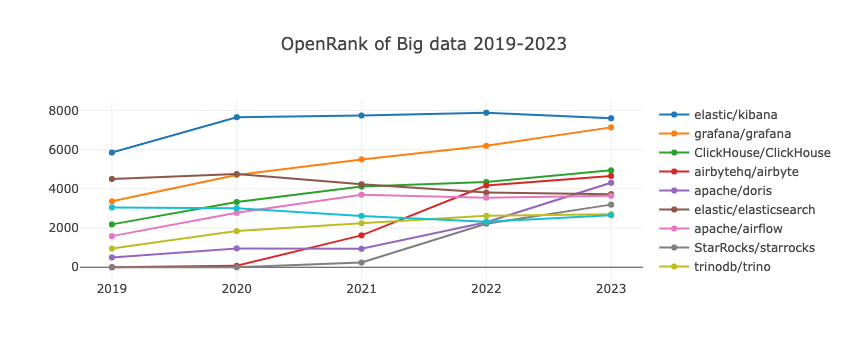

In [10]:
processTechFieldData(':technology/big_data', 'Big data');

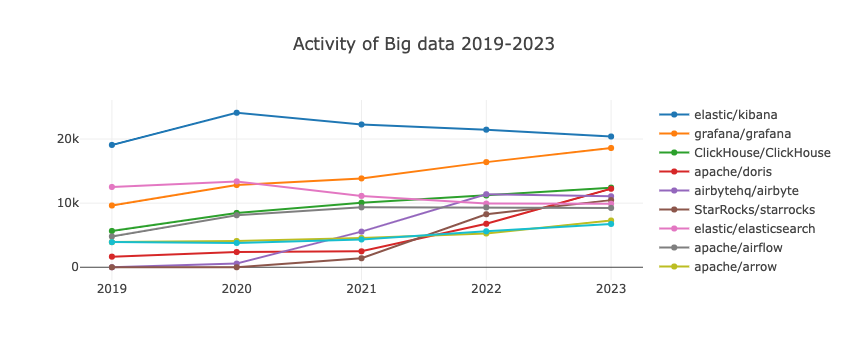

In [11]:
processTechFieldDataActivity(':technology/big_data', 'Big data')

### 数据库

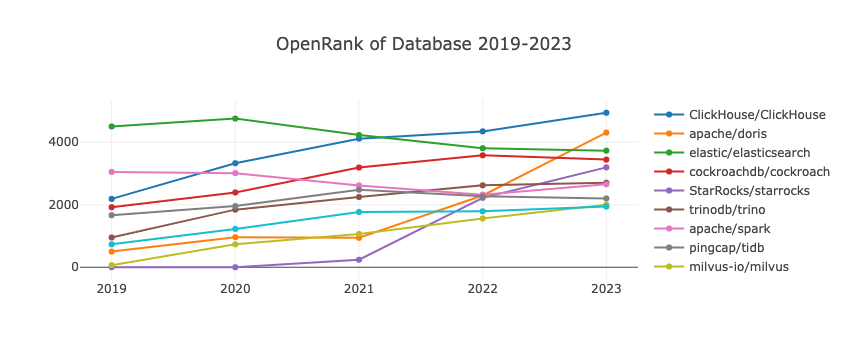

In [12]:
processTechFieldData(':technology/database', 'Database');

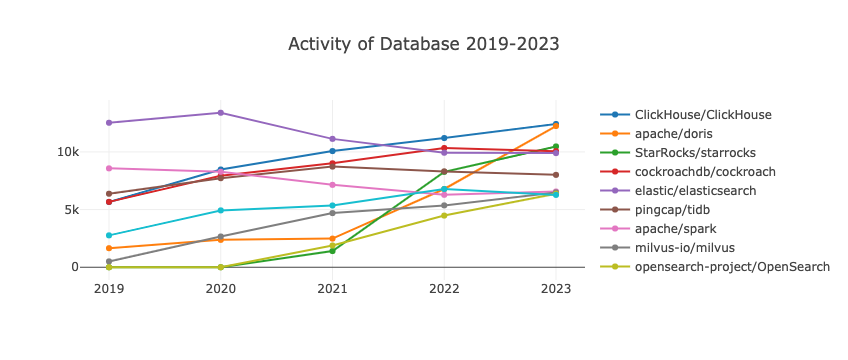

In [13]:
processTechFieldDataActivity(':technology/database', 'Database');

### 操作系统

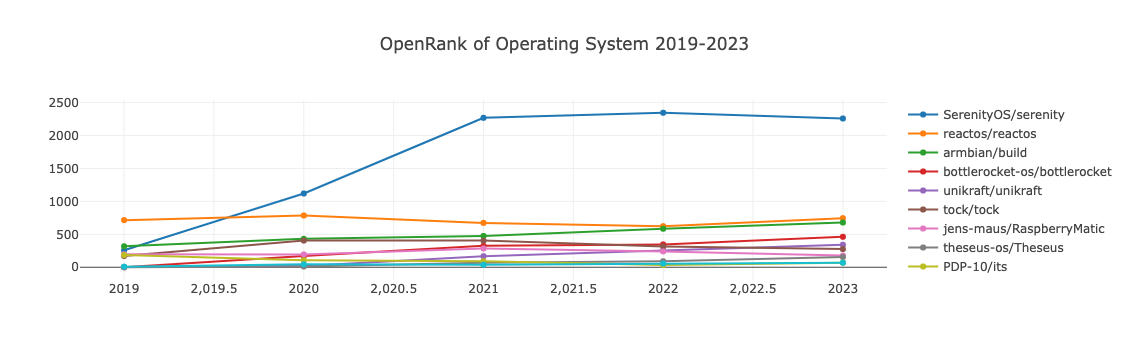

In [14]:
processTechFieldData(':technology/operating_system', 'Operating System');

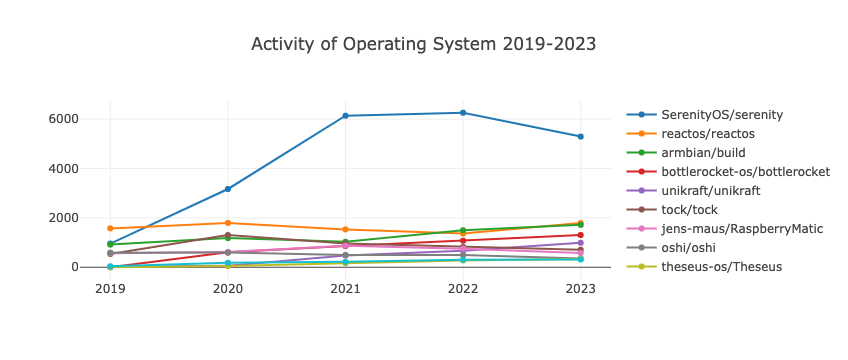

In [15]:
processTechFieldDataActivity(':technology/operating_system', 'Operating System');

### 云原生

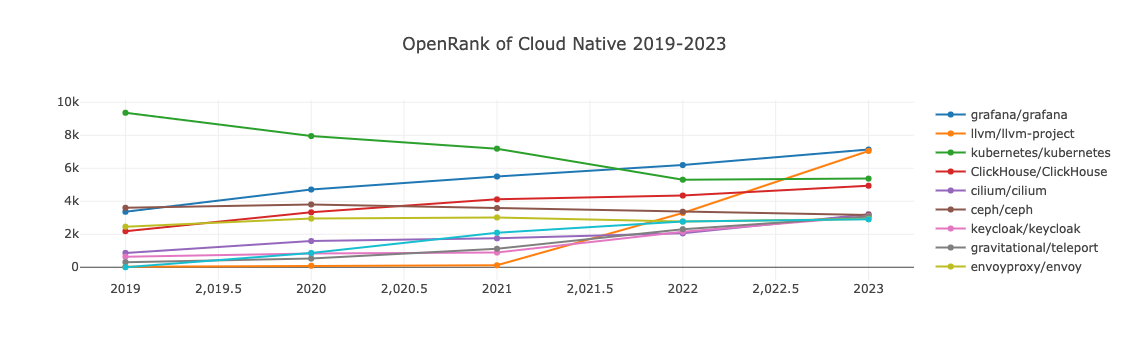

In [16]:
processTechFieldData(':technology/cloud_native', 'Cloud Native');

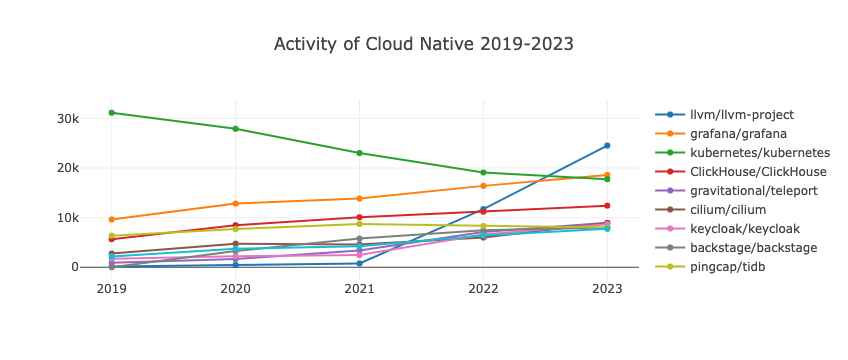

In [17]:
processTechFieldDataActivity(':technology/cloud_native', 'Cloud Native');

### 前端

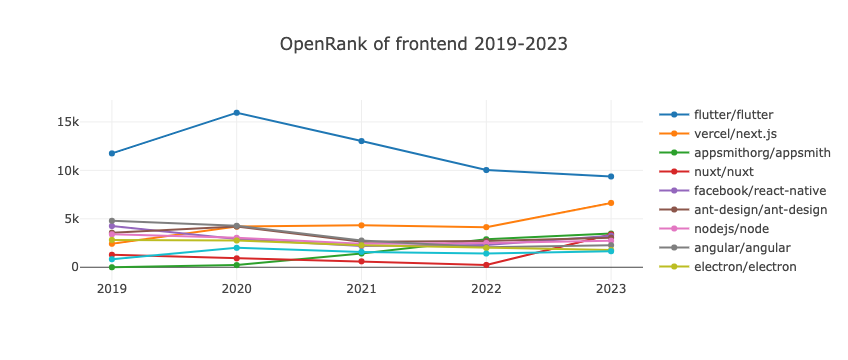

In [18]:
processTechFieldData(':technology/frontend', 'frontend');

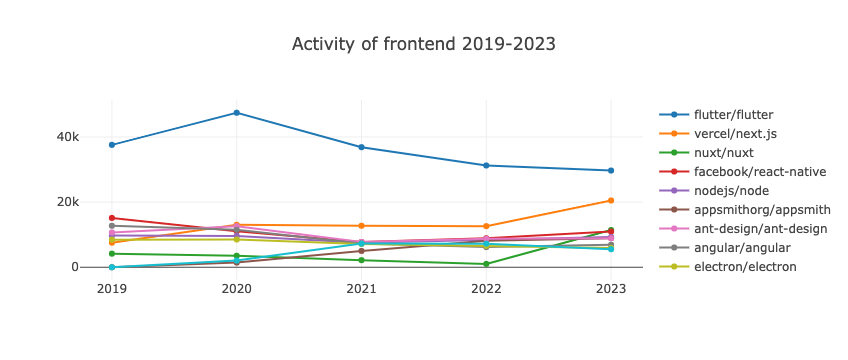

In [19]:
processTechFieldDataActivity(':technology/frontend', 'frontend');

### 人工智能

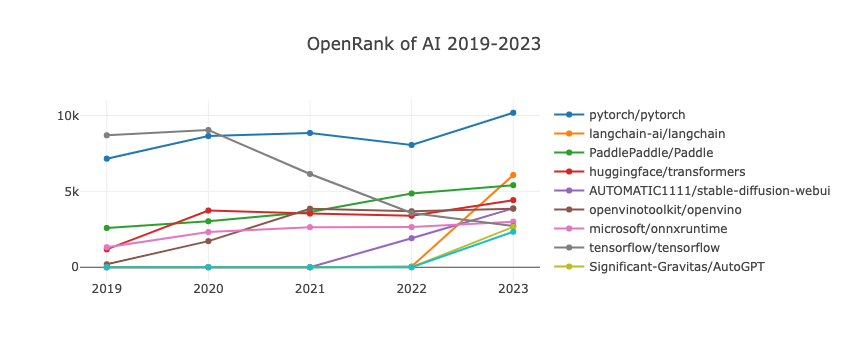

In [20]:
processTechFieldData(':technology/ai', 'AI');

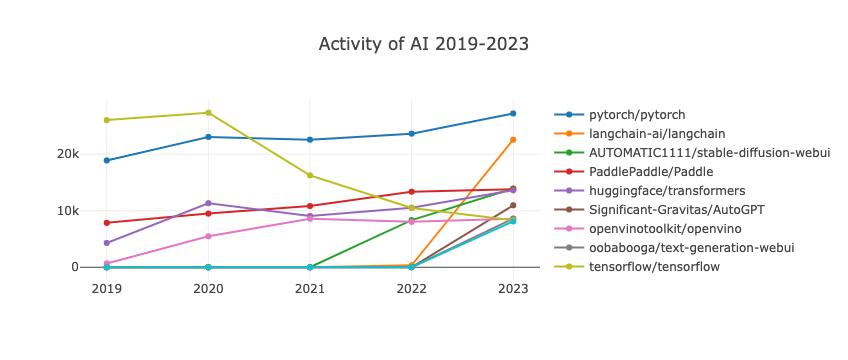

In [21]:
processTechFieldDataActivity(':technology/ai', 'AI');

### 3.3 各子领域近5年变化趋势

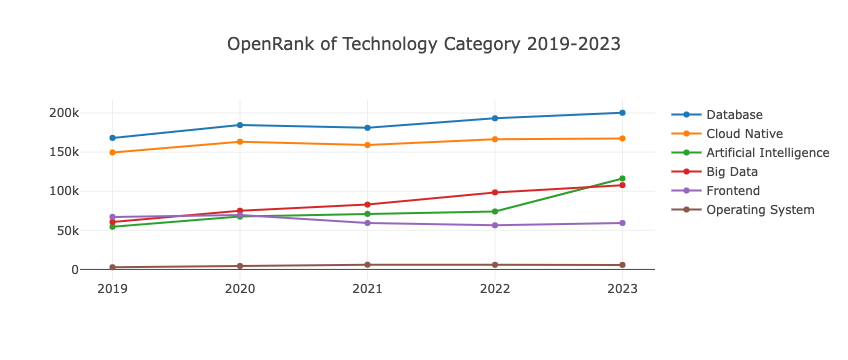

In [22]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-4',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Technology Category 2019-2023`, xaxis: { type: 'category' }});
})

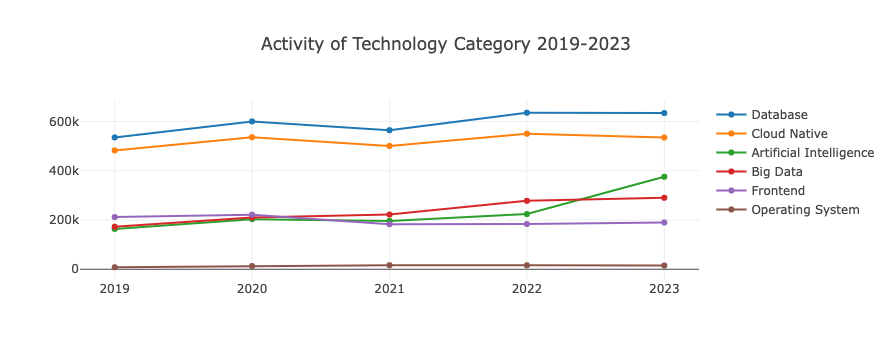

In [24]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-4',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of Technology Category 2019-2023`, xaxis: { type: 'category' }});
})

## 6.开源项目洞察

### 6.1 不同项目类型数量比例

![jupyter](./img/repo_count.png)

1. Libraries and Frameworks占比较高： 这一类项目占比约31.36%。这可能意味着在开源社区中，对于构建和提供工具、框架以及库的需求非常高。这些项目对于其他开发者来说是重要的基础资源。
2. Application Software也有相当份额： 这类项目占比约24.34%。这显示了开发者们不仅对于工具和基础设施感兴趣，也有很多人专注于构建实际的应用程序和软件产品。
3. Non Software类占比较大： 这类项目占比约23.17%。这表明GitHub社区中还存在着大量非软件类项目，可能涉及文档、教育、艺术、硬件或其他非编程相关领域的创作和贡献。
4. Software Tools和System Software占比较少： 这两类项目占比合计约21.13%。可能因为这些项目相对特定或者是较为专业化的工具和系统软件，因此数量较少。

### 6.2 生成式AI领域项目分析

### 生成式AI领域项目 OpenRank Top 10

此处给出数个生成式AI领域 2023 年度 OpenRank 指标 Top 10 项目及其自 2018 年起的 OpenRank 变化趋势。*

In [27]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                  name                  │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼─────────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 6080.25 ] │
│    1    │ '155220641' │ 'GitHub' │       'huggingface/transformers'       │ [ 4422.84 ] │
│    2    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 3881.6 ]  │
│    3    │ '614765452' │ 'GitHub' │     'Significant-Gravitas/AutoGPT'     │ [ 2664.85 ] │
│    4    │ '612354784' │ 'GitHub' │         'ggerganov/llama.cpp'          │ [ 2339.8 ]  │
│    5    │ '580642043' │ 'GitHub' │   'oobabooga/text-generation-webui'    │ [ 2242.5 ]  │
│    6    │ '208728772' │ 'GitHub' │           'milvus-io/milvus'           │ [ 2001.11 ] │
│    7    │ '560704231' │ 'GitHub' │        'run-llama/llama_index'         │ [ 

### 生成式AI领域项目 活跃度 Top 10

In [28]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬──────────────┬──────────────┬───────────────┬────────────┬────────────┬────────────────┬─────────────┬───────────┐
│ (index) │     id      │ platform │                  name                  │   activity   │ participants │ issue_comment │ open_issue │ open_pull  │ review_comment │ merged_pull │  details  │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼──────────────┼──────────────┼───────────────┼────────────┼────────────┼────────────────┼─────────────┼───────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 22563.04 ] │ [ '13068' ]  │  [ '32196' ]  │ [ '4851' ] │ [ '7732' ] │   [ '6693' ]   │ [ '5978' ]  │ undefined │
│    1    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 13933.03 ] │ [ '11064' ]  │  [ '22481' ]  │ [ '3444' ] │ [ '1229' ] │   [ '192' ]    │  [ '828' ]  │ undefined │
│    2    │ '155220641' │ 'GitHub' 

### 生成式AI领域 OpenRank Top 10 项目近5年增长趋势

In [29]:
var startYear = 2019; year = 2023;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2023]

2023

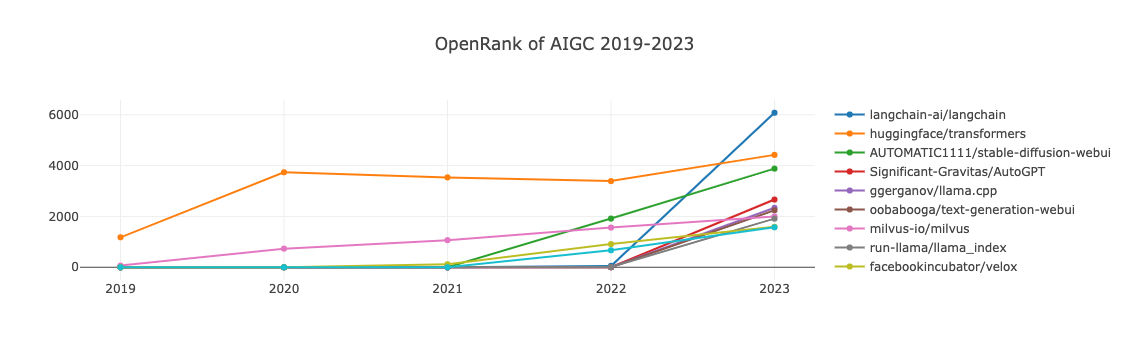

In [30]:
openDigger.index.openrank.getRepoOpenrank({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC 2019-2023`, xaxis: { type: 'category' }});
});

### 生成式AI领域 活跃度 Top 10 项目近5年增长趋势

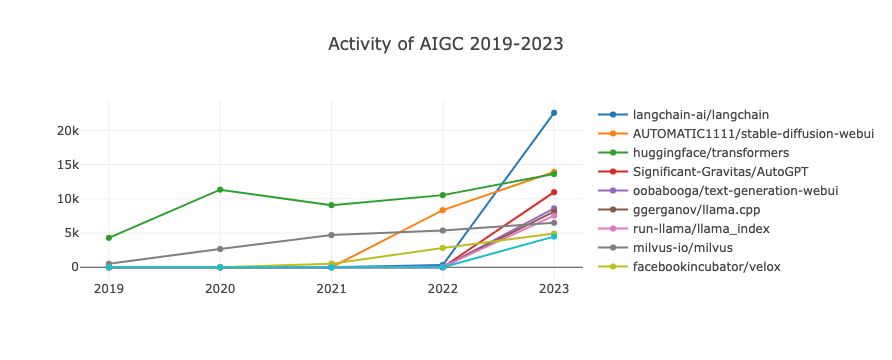

In [31]:
openDigger.index.activity.getRepoActivity({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of AIGC 2019-2023`, xaxis: { type: 'category' }});
});

### 生成式AI各子领域近5年增长趋势

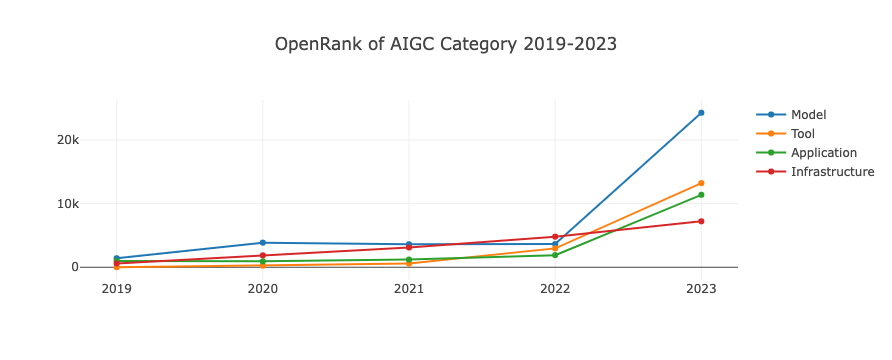

In [32]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-3',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/ai/generative_ai'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC Category 2019-2023`, xaxis: { type: 'category' }});
})

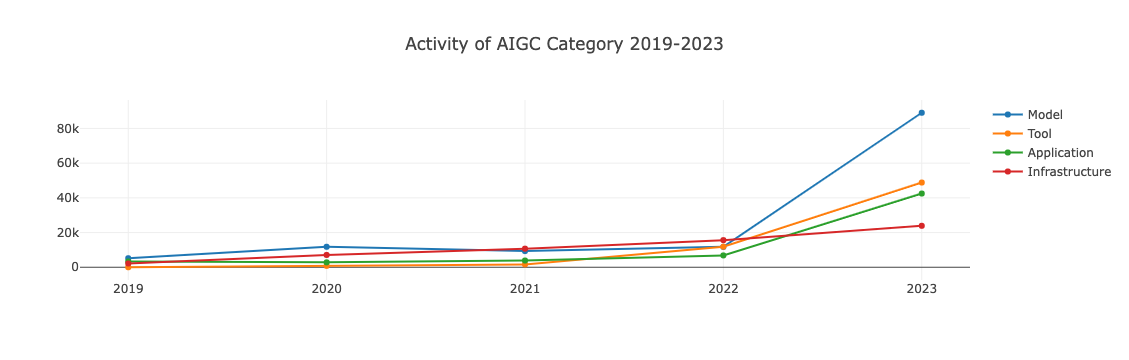

In [33]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: 2019, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-3',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/ai/generative_ai'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of AIGC Category 2019-2023`, xaxis: { type: 'category' }});
})

### 6.3 项目 Topic 分析

![jupyter](./img/topic_top10.png)